# CENG 782: Planning of Robotic Manipulation - Spring 2017
## Assignment 3

In [159]:
# Let printing work the same in Python 2 and 3
from __future__ import print_function
# Import required modules in this notebook
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

### (1)

Use the following questions to warm-up.

**(a)** Consider an infinite straight line $L$ that can move freely in 3D space. Assume that $L$
is indistinguishable when rotated by $\pi$ around its ”center”. What’s the configuration
space dimension of $L$?

**Answer**

![C-spaces of lines](img/a3_1-2.jpg "C-spaces of lines")
As shown in the figure above on the left, an infinite line can be expressed by means of the points $(x_1, y_1)$ and $(x_2, y_2)$ on two parallel planes assuming the infinite line $L$ is not parallel to the planes. The configuration space of $L$ is $q=(x_1, y_1, x_2, y_2)$. Therefore, its dimension is 4.

**(b)** Now consider an finite straight line $F$ that can move freely in 3D space. Assume that
$F$ is indistinguishable when rotated by $\pi$ around its center. What’s the configuration
space dimension of $F$?

**Answer**

In case of a finite line as shown in the figure above on the right, the line segment $F$ can also move along the infinite line $L$, which brings another dimension to its configuration space. Assuming the displacement along $L$ is denoted by $d$, the configuration space becomes $q=(x_1, y_1, x_2, y_2, d)$. Therefore, its dimension is 5.

### (2) Question

Consider a robot $A$ modeled by an oriented finite line segment of length $2$ on a plane $W$ .
Assume that the configuration of the robot is represented with $(x, y, \theta)$ where $(x, y)$ are
the center of the line and $\theta$ is the angle of the line in the world coordinate system. Note
that in this case, the line is oriented, that is the configurations $(x, y, \theta)$ are different from
$(x, y, \theta + \pi)$. Now consider an obstacle $O$ in the form of a square centered at $(0, 2)$ with
sides length of $2$. **

**(a)** Draw the C-obstacles corresponding to $O$ when $A$ is only allowed to translate at the
orientations $\theta = 0$, $\pi/4$, $\pi/2$. That is, draw one C-obstacle for each orientation.

**Answer**

C-obstacles are given by the following plots.

<IPython.core.display.Javascript object>


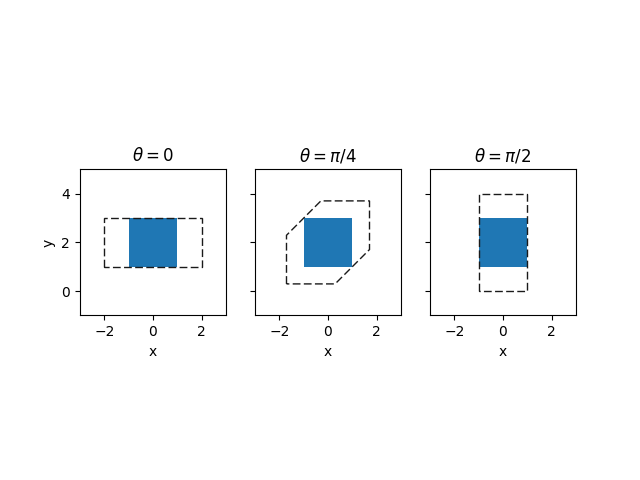

In [160]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, sharey=True)
ax1.set_xlim((-3, 3))
ax1.set_ylim((-1, 5))
ax1.set_title('$\\theta=0$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set(adjustable='box-forced', aspect='equal')
obstacle = patches.Polygon([(-1, 1), (-1, 3), (1, 3), (1, 1)])
c_obs = patches.Polygon([(-2, 1), (-2, 3), (2, 3), (2, 1)],
                         linestyle='--',
                         facecolor='none',
                         edgecolor='0.1')
ax1.add_patch(obstacle)
ax1.add_patch(c_obs)

ax2.set_title('$\\theta=\pi/4$')
ax2.set_xlabel('x')
ax2.set(adjustable='box-forced', aspect='equal')
obstacle = patches.Polygon([(-1, 1), (-1, 3), (1, 3), (1, 1)])
c_obs = patches.Polygon([(-1-np.sqrt(2)*0.5, 1-np.sqrt(2)*0.5), (-1-np.sqrt(2)*0.5, 3-np.sqrt(2)*0.5),
                          (-1+np.sqrt(2)*0.5, 3+np.sqrt(2)*0.5), (1+np.sqrt(2)*0.5, 3+np.sqrt(2)*0.5),
                          (1+np.sqrt(2)*0.5, 1+np.sqrt(2)*0.5), (1-np.sqrt(2)*0.5, 1-np.sqrt(2)*0.5)],
                         linestyle='--',
                         facecolor='none',
                         edgecolor='0.1')
ax2.add_patch(obstacle)
ax2.add_patch(c_obs)

ax3.set_title('$\\theta=\pi/2$')
ax3.set_xlabel('x')
ax3.set(adjustable='box-forced', aspect='equal')
obstacle = patches.Polygon([(-1, 1), (-1, 3), (1, 3), (1, 1)])
c_obs = patches.Polygon([(-1, 0), (-1, 4), (1, 4), (1, 0)],
                         linestyle='--',
                         facecolor='none',
                         edgecolor='0.1')
ax3.add_patch(obstacle)
ax3.add_patch(c_obs)
plt.show()

**(b)** Using the C-obstacles drawn in the previous item, comment on how the C-obstacles
in the complete 3-D configuration space. Does it have holes? Is it convex? At which
orientations does the C-obstacle cross-section goes under qualitative changes?

**Answer**

- No holes.
- Not convex in 3D.
- Cross-sections are convex polygons for constant $\theta$ values.
- Qualitative changes occur at $\theta = 0$, $\pi/2$ and $3\pi/2$.

**(c)** Now constrain the center of $A$ to lie on the x-axis of the world coordinate system.
With $A$ able to translate along y-axis and rotate, what is the configuration space of
$A$? Draw the C-obstacle corresponding to $O$. Is it connected? How does it related
with the C-obstacles drawn in the previous item?

**Answer**

*According to the new constraint, it is not feasible to translate $A$ along y-axis, this asnwer assumes that the robot translates along x-axis so that its center lines on the x-axis.*

Configuration space is now two-dimensional $q = (x, \theta)$. New C-obstacle is given by the plot below. It is made of two connected components at $\theta=\pi/2$ and $\theta=-\pi/2$ as shown in the figure below. Because the C-obstacle was not convex previously, the new C-obstacle does not consist of a single connected component.

<IPython.core.display.Javascript object>


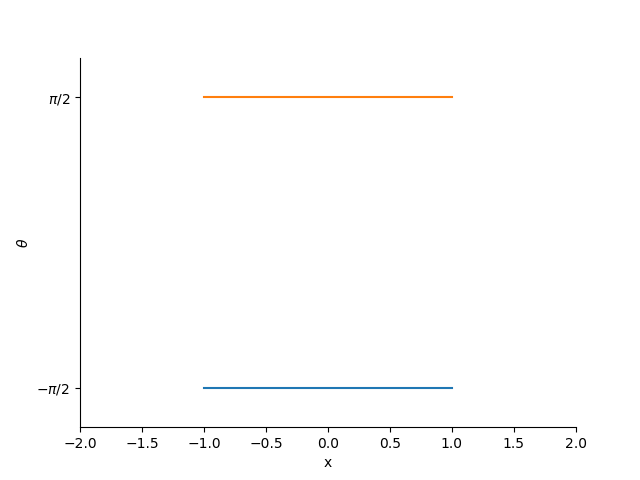

In [161]:
fig, ax = plt.subplots()
x = np.linspace(-1, 1)
ax.set_xlim((-2,2))
ax.set_ylim((-2,2))
ax.set_xlabel('x')
ax.set_ylabel('$\\theta$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.set_yticks((-np.pi/2, np.pi/2))
ax.set_yticklabels(('$-\pi/2$', '$\pi/2$'))
ax.plot(x, [-np.pi/2]*len(x))
ax.plot(x, [np.pi/2]*len(x))
plt.show()

### (3)
Consider a planar elbow robot $A$ with two revolute joints $\theta_1$ and $\theta_2$ with its base at $(0, 0)$
in the world coordinate frame and link lengths $l_1$ and $l_2$.

**(a)** What’s the configuration space of $A$ when $\theta_1$ , $\theta_2$ $\in$ [$−\infty$, $\infty$] with the motion of the joints not limited?

**Answer** Square [$0$, $2\pi$)x[$0$, $2\pi$)

**(b)** What’s the configuration space of $A$ when $\theta_1$, $\theta_2$ $\in$ [$−\pi$, $\pi$] with the motion of the joints not limited to one full rotation? Use this robot model for the rest of the question.

**Answer** Square [$-\pi$, $\pi$]x[$-\pi$, $\pi$]

**(c)** Consider two circular obstacles $O_1$ and $O_2$ placed at $(m, n)$ and $(−m, n)$ with a radius
of $k$. Write a program (in MATLAB or any other language) that would draw the C-obstacle by sampling the configuration space. Your program should take $l_1$ , $l_2$ , $m$, $n$, $k$
values as input to produce the C-obstacle.

**Answer**

We sample from the configuration space and check if the links intersect with the obstacles. Several solution to figure out if the links and obstacles intersect can be found [here](http://mathworld.wolfram.com/Circle-LineIntersection.html). If there is an intersection, we add that sample to C-obstacle. If not, we add the sample to C-free.

In [254]:
# Parameters
L1 = 10
L2 = 8
CX = 8
CY = 3
CR = 3
UNIFORM_SAMPLING = 50
RANDOM_SAMPLING = 20
CONNECTION_DISTANCE = np.pi*2.5

def distance(p1, p2):
    return np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

def is_on_segment(p1, p2, p):
    return np.abs(distance(p1, p) + distance(p, p2) - distance(p1, p2)) <= np.pi/(5*UNIFORM_SAMPLING)
    

def check_link_collision(x1, y1, x2, y2, cx, cy, r):
    x1 -= cx
    y1 -= cy
    x2 -= cx
    y2 -= cy
    
    dx = x2 - x1
    dy = y2 - y1
    dr2 = dx**2 + dy**2
    D = x1*y2 - x2*y1
    discriminant = r**2 * dr2 - D**2
    if discriminant < 0:
        return False
    
    discrimiant_sqrt = np.sqrt(discriminant)
    sgn = -1 if dy < 0 else 1
    x_ = (D*dy - sgn*dx*discrimiant_sqrt)/dr2
    x = (D*dy + sgn*dx*discrimiant_sqrt)/dr2
    y_ = (-D*dx - np.abs(dy)*discrimiant_sqrt)/dr2
    y = (-D*dx + np.abs(dy)*discrimiant_sqrt)/dr2
    
    if is_on_segment((x1, y1), (x2, y2), (x_, y_)):
        return True
    
    if is_on_segment((x1, y1), (x2, y2), (x, y)):
        return True
    
    return False

<IPython.core.display.Javascript object>


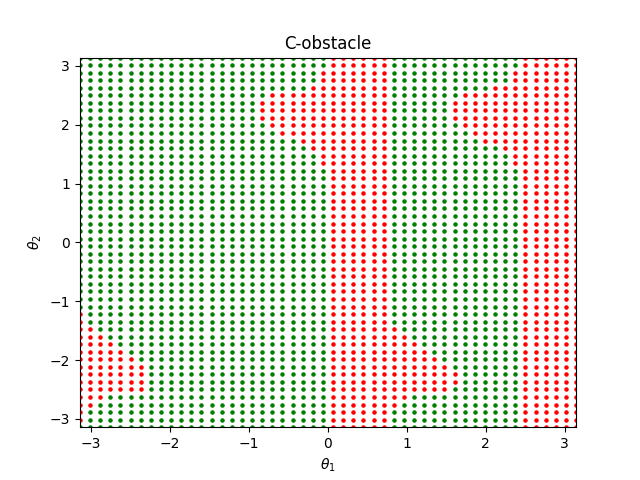

In [255]:
def get_uniform_c_space_sampling(l1, l2, m, n, k, sampling):
    c_obs = []
    c_free = []
    # Uniform sampling
    angle_range = np.linspace(-np.pi, np.pi, sampling)
    # Forward kinematics for samples
    for theta1 in angle_range:
        for theta2 in angle_range:
            # Check link1 for interestion
            x_ = l1*np.cos(theta1)
            y_ = l1*np.sin(theta1)
            
            # Check link2 for intersection            
            theta_tot = theta1 + theta2
            x = x_ + l2*np.cos(theta_tot)
            y = y_ + l2*np.sin(theta_tot)
            
            if (check_link_collision(0, 0, x_, y_, m, n, k) or
                check_link_collision(0, 0, x_, y_, -m, n, k) or
                check_link_collision(x_, y_, x, y, m, n, k) or
                check_link_collision(x_, y_, x, y, -m, n, k)):
                c_obs.append((theta1, theta2))
            else:
                c_free.append((theta1, theta2))
    return c_obs, c_free
    

c_obstacle, c_free = get_uniform_c_space_sampling(L1, L2, CX, CY, CR, UNIFORM_SAMPLING)
fig, ax = plt.subplots()
ax.set_xlim((-np.pi, np.pi))
ax.set_ylim((-np.pi, np.pi))
ax.set_xlabel('$\\theta_1$')
ax.set_ylabel('$\\theta_2$')
ax.set_title('C-obstacle')
if c_obstacle: 
    ax.scatter(*zip(*c_obstacle), s=5, color='r')
if c_free:
     ax.scatter(*zip(*c_free), s=5, color='g')
plt.show()   

**(d)** Implement the Probabilistic Roadmap Method (PRM) to sample C-space and build
a roadmap automatically. Your program should take $l_1$ , $l_2$ , $m$, $n$, $k$ values as input and
produce a graph in adjacency matrix representation. The adjacency matrix is of size
$V × V$ where $V$ is the number of vertices in the graph. In this representation, $a_{ij} = 0$
indicates that vertex $i$ is NOT connected to vertex $j$. Moreover $a_{ij} = w$ for $w > 0$
indicates that vertex $i$ is connected to vertex $j$ and that the length of the connecting
edge is $w$.

**Answer**

We perform the following operations and plot the result.

- Randomly sample C-free.
- Connect each collision-free node pair within a connection distance by a straight valid path.

<IPython.core.display.Javascript object>


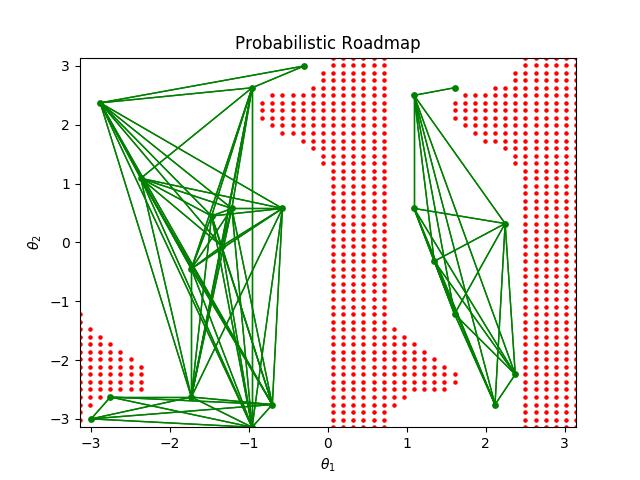

In [273]:
# Start and End configurations
START_VERTEX = (-0.3, 3.0)
GOAL_VERTEX = (-3.0, -3.0)

def build_probabilistic_roadmap(l1, l2, m, n, k, uniform_sampling, random_sampling, connection_distance):
    c_obs, c_free = get_uniform_c_space_sampling(l1, l2, m, n, k, uniform_sampling)
    vertices = random.choices(c_free, k=random_sampling)
    vertices.append(START_VERTEX)
    vertices.append(GOAL_VERTEX)
    edges = np.zeros([len(vertices)]*2)
    for i in range(len(vertices)):
        for j in range(len(vertices)):
            if i == j:
                continue
            if edges[i, j] != 0:
                continue
            v1 = vertices[i]
            v2 = vertices[j]
            d = np.sqrt((v2[0] - v1[0])**2 + (v2[1] - v1[1])**2)
            if d < connection_distance:
                is_valid = True
                for obs in c_obs:
                    if (is_on_segment(v1, v2, obs)):
                        is_valid = False
                        break
                if is_valid:
                    edges[i, j] = d
            
    return edges, vertices, c_obs

edges, vertices, c_obs = build_probabilistic_roadmap(L1, L2, CX, CY, CR,
                                                     UNIFORM_SAMPLING, RANDOM_SAMPLING,
                                                     CONNECTION_DISTANCE)
fig, ax = plt.subplots()
ax.set_xlim((-np.pi, np.pi))
ax.set_ylim((-np.pi, np.pi))
ax.set_xlabel('$\\theta_1$')
ax.set_ylabel('$\\theta_2$')
ax.set_title('Probabilistic Roadmap')

if c_obs: 
    ax.scatter(*zip(*c_obs), s=5, color='r')
    
if vertices: 
    ax.scatter(*zip(*vertices), s=15, color='g')
    num_vertices = len(vertices)
    for i in range(num_vertices):
        for j in range(num_vertices):
            if edges[i, j] != 0:
                ax.add_patch(patches.Polygon([vertices[i], vertices[j]],
                                             color="g"))
    
plt.show()    

**(e)** Overlay the robot configurations for each vertex, along with edges between them in
the world coordinate frame.

**Answer**

Following cell implements and plots the overlay.

<IPython.core.display.Javascript object>


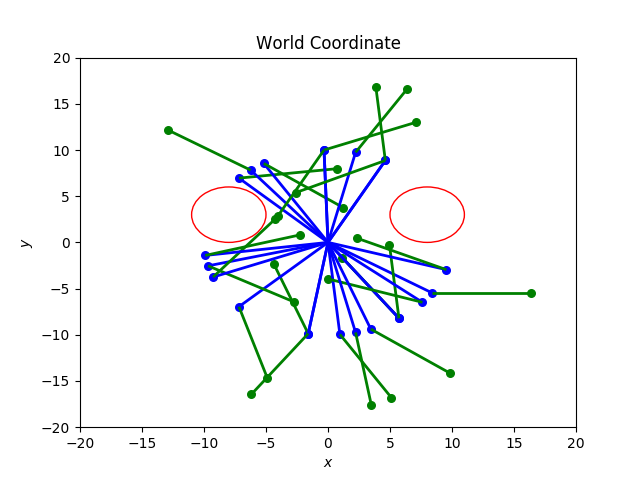

In [277]:
link1_pos = []
link2_pos = []
num_vertices = len(vertices)
for i in range(num_vertices):         
    v = vertices[i]
            
    theta1 = v[0]
    theta2 = v[1]

    # Link 1 position
    x_ = L1*np.cos(theta1)
    y_ = L1*np.sin(theta1)
            
    # Link2 position           
    theta_tot = theta1 + theta2
    x = x_ + L2*np.cos(theta_tot)
    y = y_ + L2*np.sin(theta_tot)

    link1_pos.append((x_, y_))
    link2_pos.append((x, y))

fig, ax = plt.subplots()
ax.set_xlim((-20, 20))
ax.set_ylim((-20, 20))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('World Coordinate')


circle1 = plt.Circle((CX, CY), CR, color='r', fill=False)
circle2 = plt.Circle((-CX, CY), CR, color='r', fill=False)

ax.add_artist(circle1)
ax.add_artist(circle2)


ax.scatter(*zip(*link1_pos), s=30, color='b')
ax.scatter(*zip(*link2_pos), s=30, color='g')

for p1, p2 in zip(link1_pos, link2_pos):
    ax.add_patch(patches.Polygon([(0,0), p1], color="b", lw=2))
    ax.add_patch(patches.Polygon([p1, p2], color="g", lw=2))
    
plt.show()  

**(f)** Given the weighted adjacency matrix representation of a graph, and $(i, j)$ and the
indexes of the start and goal vertices, compute the path from vertex $i$ to vertex $j$
using the $A^∗$ algorithm. In your algorithm, define and use the minimum arc length
between two configurations as the admissible distance metric.

**Answer**

Following cell implements A* algorithm and returns the indices of the vertices from $i$ to $j$.

In [275]:
from heapq import *
def heuristic(q1, q2):
    return np.sqrt((q2[0] - q1[0])**2 + (q2[1] - q1[1])**2)
    
def astar(vertices, edges, start_index, goal_index):
    close_set = set()
    parent_map = {}
    gscore = {start_index:0}
    fscore = {start_index:heuristic(vertices[start_index], vertices[goal_index])}
    open_heap = []
    
    heappush(open_heap, (fscore[start_index], start_index))
    len_vertices = len(vertices)
    while open_heap:
        current_index = heappop(open_heap)[1]
        if current_index == goal_index:
            path_indices = []
            while current_index in parent_map:
                path_indices.append(current_index)
                current_index = parent_map[current_index]
            path_indices.append(start_index)
            return path_indices
        
        close_set.add(current_index)
        for neighbor_index in range(len_vertices):
            if neighbor_index == current_index:
                continue
            w = edges[current_index, neighbor_index]
            if w != 0:
                tentative_g_score = gscore[current_index] + w
                if neighbor_index in close_set and tentative_g_score >= gscore.get(neighbor_index, 0):
                    continue
                if (tentative_g_score < gscore.get(neighbor_index, 0)
                    or neighbor_index not in [x[1] for x in open_heap]):
                    parent_map[neighbor_index] = current_index
                    gscore[neighbor_index] = tentative_g_score
                    fscore[neighbor_index] = tentative_g_score + heuristic(vertices[neighbor_index],
                                                                           vertices[goal_index])
                    heappush(open_heap, (fscore[neighbor_index], neighbor_index))
    return None   

**(g)** Given any two arbitrary configurations, compute the full path between them. Overlay
the robot configurations for each vertex, in the world coordinate frame to visualize
the path found.

**Answer**

Following cell visualizes the path found.

path_indices:  [21, 0, 11, 20]
configuration [(-3.0, -3.0), (-1.7310816662637636, -2.628679567289419), (-0.96171203681320216, 2.6286795672894181), (-0.3, 3.0)]
world [(-2.218562672801526, 0.82412390499273469), (-4.358919385704251, -2.3640704577464167), (4.9529823939602489, -0.23868964237597279), (2.3207877551195697, 0.46383697525724266)]


<IPython.core.display.Javascript object>


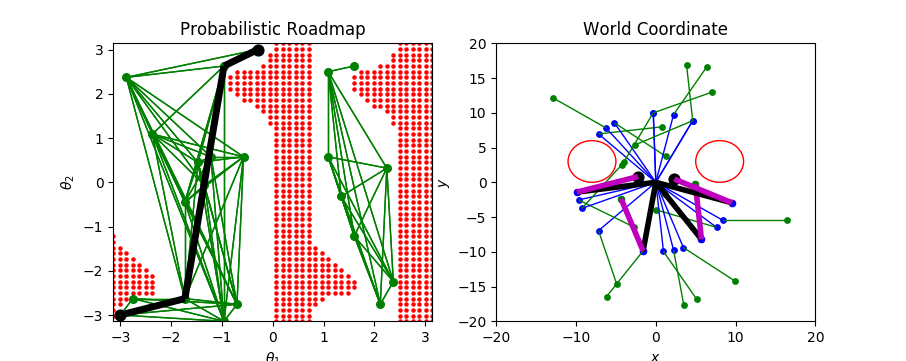

In [276]:
# Start and goal vertices are append to the end of the vertices list.
num_vertices = len(vertices)
start_index = num_vertices - 2
goal_index = num_vertices - 1

path_indices = astar(vertices, edges, start_index, goal_index)
print("path_indices: ", path_indices)

fig, ax = plt.subplots(ncols=2)
ax[0].set_xlim((-np.pi, np.pi))
ax[0].set_ylim((-np.pi, np.pi))
ax[0].set_xlabel('$\\theta_1$')
ax[0].set_ylabel('$\\theta_2$')
ax[0].set_title('Probabilistic Roadmap')

ax[0].scatter(*zip(*c_obs), s=5, color='r')
ax[0].scatter(*zip(*vertices), s=30, color='g')

for i in range(num_vertices):
    for j in range(num_vertices):
        if edges[i, j] != 0:
            ax[0].add_patch(patches.Polygon([vertices[i], vertices[j]], color="g"))
            
ax[1].set_xlim((-20, 20))
ax[1].set_ylim((-20, 20))
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_title('World Coordinate')

circle1 = plt.Circle((CX, CY), CR, color='r', fill=False)
circle2 = plt.Circle((-CX, CY), CR, color='r', fill=False)

ax[1].add_artist(circle1)
ax[1].add_artist(circle2)

    
ax[1].scatter(*zip(*link1_pos), s=15, color='b')
ax[1].scatter(*zip(*link2_pos), s=15, color='g')

for p1, p2 in zip(link1_pos, link2_pos):
    ax[1].add_patch(patches.Polygon([(0,0), p1], color="b", lw=1))
    ax[1].add_patch(patches.Polygon([p1, p2], color="g", lw=1))

if path_indices is not None:
    path_vertices = [vertices[i] for i in path_indices]
    for i in range(len(path_vertices)-1) :
        ax[0].add_patch(patches.Polygon([path_vertices[i], path_vertices[i+1]],
                                                 color="k", lw=5))
    
    path_link1_pos = [link1_pos[i] for i in path_indices]
    path_link2_pos = [link2_pos[i] for i in path_indices] 
    
    ax[1].scatter(*zip(*path_link1_pos), s=20, color='b')
    ax[1].scatter(*zip(*path_link2_pos), s=20, color='g')

    for p1, p2 in zip(path_link1_pos, path_link2_pos):
        ax[1].add_patch(patches.Polygon([(0,0), p1], color="k", lw=4))
        ax[1].add_patch(patches.Polygon([p1, p2], color="m", lw=4))
    
    ax[1].scatter(*zip(path_link2_pos[0], path_link2_pos[-1]), s=60, color='k')
    print("configuration", path_vertices)
    print("world", path_link2_pos)
else:
    print("path indices is None!")

ax[0].scatter(*zip(vertices[start_index], vertices[goal_index]), s=60, color='k')  
plt.show() 